<a href="https://colab.research.google.com/github/Saicharan1818/theta/blob/main/toyotacar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
from google.colab import files
uploaded = files.upload()
file_name=list(uploaded.keys())[0]
print(file_name)

Saving Toyoto_Corrola.csv to Toyoto_Corrola.csv
Toyoto_Corrola.csv


In [4]:
df=pd.read_csv(file_name)
df

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [5]:
df.corr(numeric_only=True)

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.130207,NaN,-0.043343,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age_08_04,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.043343,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


In [6]:
#build model
import statsmodels.formula.api as smf


model=smf.ols('Id~Price+Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight',data=df).fit()

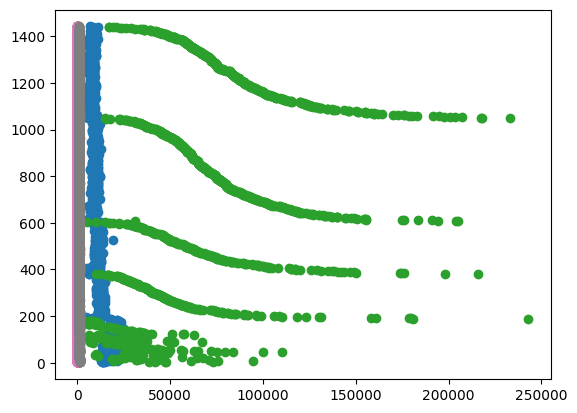

In [7]:
#add scatter plots for the above code
import matplotlib.pyplot as plt
plt.scatter(df['Price'],df['Id'])
plt.scatter(df['Age_08_04'],df['Id'])
plt.scatter(df['KM'],df['Id'])
plt.scatter(df['HP'],df['Id'])
plt.scatter(df['Doors'],df['Id'])
plt.scatter(df['Cylinders'],df['Id'])
plt.scatter(df['Gears'],df['Id'])
plt.scatter(df['Weight'],df['Id'])

In [8]:
model.params

,0
Intercept,-42.783296
Price,0.010155
Age_08_04,25.626437
KM,-0.002979
HP,-1.289438
Doors,-4.025306
Cylinders,-171.133185
Gears,-70.701033
Weight,0.571425


In [9]:
print(model.tvalues, '\n', model.pvalues)

Intercept    -5.029911
Price         3.517718
Age_08_04    56.455514
KM          -20.691358
HP           -4.343614
Doors        -0.922285
Cylinders    -5.029911
Gears        -3.270382
Weight        5.430496
dtype: float64 
 Intercept    5.529410e-07
Price        4.489178e-04
Age_08_04    0.000000e+00
KM           2.143748e-83
HP           1.500523e-05
Doors        3.565357e-01
Cylinders    5.529410e-07
Gears        1.099630e-03
Weight       6.596669e-08
dtype: float64


In [10]:
(model.rsquared, model.rsquared_adj)

(0.8761621470163653, 0.8755550987174259)

In [11]:
ml_v=smf.ols('Id~Price',data = df).fit()
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    70.410024
Price       -41.445617
dtype: float64 
 Intercept     0.000000e+00
Price        1.739147e-247
dtype: float64


In [12]:
(ml_v.rsquared, ml_v.rsquared_adj)

(0.5450131056352484, 0.5446958204927347)

In [13]:
ml_w=smf.ols('Id~Age_08_04',data = df).fit()
print(ml_w.tvalues, '\n', ml_w.pvalues)

Intercept   -28.047323
Age_08_04    81.120387
dtype: float64 
 Intercept    2.331097e-138
Age_08_04     0.000000e+00
dtype: float64


In [14]:
(ml_v.rsquared,ml_v.rsquared_adj)

(0.5450131056352484, 0.5446958204927347)

In [15]:
#calculating VIF
#Variance Inflation Factor
rsq_id= smf.ols("Id~Price+Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight",data=df).fit().rsquared
vif_id=1/(1-rsq_id)

rsq_price=smf.ols("Price~Id+Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight",data=df).fit().rsquared
vif_price=1/(1-rsq_price)

rsq_Age_08_04=smf.ols("Age_08_04~Id+Price+KM+HP+Doors+Cylinders+Gears+Weight",data=df).fit().rsquared
vif_Age_08_04=1/(1-rsq_Age_08_04)

rsq_km=smf.ols("KM~Id+Age_08_04+Price+HP+Doors+Cylinders+Gears+Weight",data=df).fit().rsquared
vif_km=1/(1-rsq_km)
rsq_hp=smf.ols("HP~Id+Age_08_04+KM+Price+Doors+Cylinders+Gears+Weight",data=df).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_doors=smf.ols("Doors~Id+Age_08_04+KM+HP+Price+Cylinders+Gears+Weight",data=df).fit().rsquared
vif_doors=1/(1-rsq_doors)

rsq_cylinders=smf.ols("Cylinders~Id+Age_08_04+KM+HP+Doors+Price+Gears+Weight",data=df).fit().rsquared
vif_cylinders=1/(1-rsq_cylinders)

rsq_gears=smf.ols("Gears~Id+Age_08_04+KM+HP+Doors+Cylinders+Price+Weight",data=df).fit().rsquared
vif_gears=1/(1-rsq_gears)

rsq_weight=smf.ols("Weight~Id+Age_08_04+KM+HP+Doors+Cylinders+Gears+Price",data=df).fit().rsquared
vif_weight=1/(1-rsq_weight)

d1 = {'Variables':['Id','Price','Age_08_04','KM','HP','Doors','Cylinders','Gears','Weight'],'VIF':[vif_id,vif_price,vif_Age_08_04,vif_km,vif_hp,vif_doors,vif_cylinders,vif_gears,vif_weight]}


Vif_frame=pd.DataFrame(d1)
Vif_frame


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Variables,VIF
0,Id,8.075075
1,Price,7.351921
2,Age_08_04,15.316049
3,KM,2.519843
4,HP,1.332227
5,Doors,1.150032
6,Cylinders,0.000000
7,Gears,1.112395
8,Weight,2.081898


In [16]:
(model.rsquared, model.rsquared_adj)

(0.8761621470163653, 0.8755550987174259)

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
toyota_cars = pd.read_csv(file_name)

Saving Toyoto_Corrola.csv to Toyoto_Corrola (1).csv


In [ ]:
car1 = toyota_cars.drop(toyota_cars.index[[70,76]],axis=0).reset_index()

In [ ]:
car1=car1.drop(['index'],axis=1)
car1

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1430,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1431,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1432,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [20]:
tcar=pd.read_csv(file_name)
tcar

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015
